In [1]:
import pandas as pd
import numpy as np
import palettable
import seaborn as sns
import scipy.stats

# plotting
import matplotlib.pyplot as plt
import matplotlib
from matplotlib.container import BarContainer
from matplotlib import lines
from brokenaxes import brokenaxes
import matplotlib.gridspec as gridspec
from matplotlib.ticker import FuncFormatter
from matplotlib import patches as mpatches

from scripts import figures

from scripts import aesthetics
aesthetics.activate_paper_rcParams()

from scripts import phylogic_visualization
from scripts import plot_seg
from scripts import copynumber

bold_10 = palettable.cartocolors.qualitative.Bold_10.mpl_colors

## Supplementary Figure S7 - Additional geographic characteristics of patient-partner residential areas, related to Fig. 1D, E

In [2]:
rural_distances = pd.read_csv('ref/data/rural-distances.csv')
adi_related_data = pd.read_csv('ref/data/hpsa-mua-rural-adi-nci.csv')

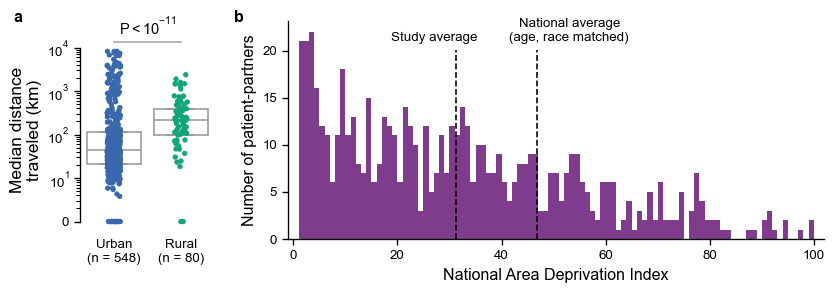

In [3]:
fig, axes = plt.subplots(1, 2, figsize = (10, 3), gridspec_kw = {'width_ratios': [2, 8], 'wspace': 0.22})

# plot distance for rural
ax = axes[0]
order = [False, True]
sns.stripplot(x = 'Rural', y = 'Log10_distance', data = rural_distances, 
              order = order, ax = ax, s = 4, palette = {False: bold_10[2], True: bold_10[1]})
sns.boxplot(x = 'Rural', y = 'Log10_distance', data = rural_distances, 
              order = order, color = 'white', ax = ax, fliersize = 0, whis = 0)

# plot p values
n_data = rural_distances[~(rural_distances['Rural'])].dropna()
y_data = rural_distances[(rural_distances['Rural'])].dropna()

value, p = scipy.stats.mannwhitneyu(n_data['Log10_distance'], y_data['Log10_distance'], alternative = 'two-sided')
ax.text(x = 0.5, y = 1.03, s = "$\mathregular{P<10^{-11}}$", 
           ha = 'center', va = 'top', fontsize = 11, transform = ax.transAxes)

sns.despine(ax = ax, bottom = True)
ax.set_ylim([-0.4, 4.6])

ax.set_xlabel('')
ax.set_ylabel('Median distance\ntraveled (km)')

counts = adi_related_data['RURAL'].value_counts()
ax.set_xticklabels(['Urban\n(n = {})'.format(counts.loc[0]), 
                    'Rural\n(n = {})'.format(counts.loc[1])])

# ax.minorticks_off()
ax.yaxis.set_ticks([np.log10(x) for p in range(0,4) for x in np.linspace(10**p, 10**(p+1), 10)], minor=True)
ax.yaxis.set_major_formatter(plt.FuncFormatter(figures.format_func))
ax.tick_params(axis = 'x', length = 0, pad = 0)
ax.spines['left'].set_bounds([0, 4])
ax.plot([0, 1], [4.12, 4.12], color = 'darkgrey');

ax = axes[1]
ax.hist(adi_related_data['ADI_NATRNK'], bins = np.arange(1, 101));
ax.set_xlabel('National Area Deprivation Index', fontsize = 12)
ax.set_ylabel('Number of patient-partners', fontsize = 12)
ax.axvline(x = 46.77, 
           color = 'black', linestyle = 'dashed', ymax = 0.87)
ax.text(x = 53, y = 21, 
        s = 'National average\n(age, race matched)', ha = 'center', fontsize = 10)
ax.axvline(x = 31.28, 
           color = 'black', linestyle = 'dashed', ymax = 0.87)
ax.text(x = 27, y = 21, 
        s = 'Study average', ha = 'center', fontsize = 10)
ax.set_xlim([-1, 102])
sns.despine(ax = ax)
axes[0].text(s = 'a', fontweight = 'bold', x = -0.5, y = 1, transform = axes[0].transAxes)
axes[1].text(s = 'b', fontweight = 'bold', x = -0.10, y = 1, transform = axes[1].transAxes);
fig.savefig('figures/supplementary-figures/supplementary-s7.pdf', bbox_inches='tight')


## Supplementary Figure S8 - Associations between sample characteristics and scarHRD score, related to Fig. 3B

This figure cannot be reproduced here because it contain informations about germline pathogenic mutations on a non-summary level.

## Supplementary Figure S10 - Somatic losses affecting genes with pathogenic germline mutations, related to Fig. 3E

This figure cannot be reproduced here because it contain informations about germline pathogenic mutations on a non-summary level.

## Supplementary Figure S11 - Phylogenetics of samples from patient-partner 0213, related to Fig. 4B

In [4]:
pt_prtner_0213_mut_ccf = pd.read_csv('ref/data/phylogic_data/RP-1532_PCProject_0213.mut_ccfs.txt', sep = '\t')
pt_prtner_0213_cluster_ccf = pd.read_csv('ref/data/phylogic_data/RP-1532_PCProject_0213.cluster_ccfs.txt', sep = '\t')

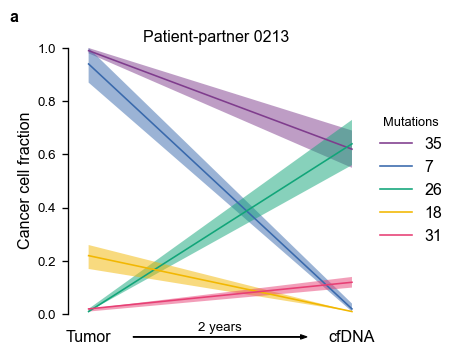

In [5]:
fig, ax = plt.subplots(1, figsize = (4, 4))
fig_inv_transform = fig.transFigure.inverted()
phylogic_dict = {}

phylogic_results = phylogic_visualization.PhylogicTwoTPResult(pt_prtner_0213_cluster_ccf, pt_prtner_0213_mut_ccf)

# phylogic_results.purities = release_pairs.loc[pairs, 'forcecall_purity']
phylogic_results.biopsy_sites = ['cfDNA', 'Tumor']
phylogic_results.plot_phylogic(ax = ax, size_cutoff = 7, ccf_cutoff = 0.10)

# change colors to match other plots
ax.lines[1].set_color(bold_10[2])
ax.lines[2].set_color(bold_10[1])
ax.collections[1].set_facecolor(bold_10[2])
ax.collections[2].set_facecolor(bold_10[1])

ax.legend(title = 'Mutations', bbox_to_anchor = (1, 0.5))

plt.draw()
windows = [t.get_window_extent() for t in ax.get_xticklabels()]
bottom_corner = (np.max(windows[0].intervalx), np.min(windows[0].intervaly))
top_corner = (np.min(windows[1].intervalx), np.max(windows[1].intervaly))

# convert to figure coordinates
bottomc_fig = fig_inv_transform.transform(bottom_corner)
topc_fig = fig_inv_transform.transform(top_corner)
dx, dy = topc_fig - bottomc_fig

arrow_ax = fig.add_axes([bottomc_fig[0], bottomc_fig[1], dx, dy])
sns.despine(ax = arrow_ax, bottom = True, left = True)
arrow_ax.get_xaxis().set_visible(False)
arrow_ax.get_yaxis().set_visible(False)

buffer = 0.1
arrow_ax.arrow(x = buffer, y = 0.5, dx = 1 - 2*buffer, dy = 0, length_includes_head = True, 
               head_length = 0.03, head_width = 0.30, width = 0.04, color = 'black')
arrow_ax.set_ylim([0, 1])
arrow_ax.set_xlim([0, 1])

# add years label
arrow_ax.text(s = '2 years', x = 0.5, y = 0.7, ha = 'center', va = 'bottom', fontsize = 10)

ax.set_ylabel('Cancer cell fraction', fontsize = 12)
ax.set_title('Patient-partner 0213', fontsize = 12, y = 0.95)
ax.text(x = -0.3, y = 1.1, s = 'a', weight = 'bold')
ax.spines['left'].set_bounds(0, 1)

# convert alpha to absolute color
children = ax.get_children()
for child in children[:5]:
    child.set_rasterized(True)
    
fig.savefig('figures/supplementary-figures/supplementary-s11.pdf', bbox_inches='tight')

## Supplementary Figure S12 - Copy number profiles of shared tumor and cfDNA samples, related to Fig. 4B

In [6]:
shared_samples = ['RP-1532_PCProject_0093_T2_v2_Exome_OnPrem',
 'RP-1532_PCProject_0093_BLOOD_P_v1_Exome_OnPrem',
 'RP-1532_PCProject_0213_T1_v2_Exome_OnPrem',
 'RP-1532_PCProject_0213_BLOOD_P_v1_Exome_OnPrem',
 'RP-1532_PCProject_0495_T1_v2_Exome_OnPrem',
 'RP-1532_PCProject_0495_BLOOD_P_v3_Exome_OnPrem']

purities = [0.62, 0.2, '', 0.56, 0.24, '', 0.5, 0.45]
patients = ['0093', '0093', '', '0213', '0213', '', '0495', '0495']

In [7]:
absolute_copy_number_data = pd.read_csv('ref/data/supplementary_data/supplementary-data-4.csv')
absolute_copy_number_data = absolute_copy_number_data.rename(columns={'Chromosome': 'chrom', 'Segment_Start': 'start', 'Segment_End': 'end'})
absolute_copy_number_data['chrom'] = absolute_copy_number_data['chrom'].astype(str)
absolute_copy_number_data = absolute_copy_number_data[absolute_copy_number_data['chrom'] != 'X']
absolute_copy_number_data.head(2)

,Sample,chrom,start,end,Log_Copy_Ratio,Allele_1_CN,Allele_2_CN
0,RP-1532_PCProject_0013_T1_v2_Exome_OnPrem,1,12176,17198473.0,0.090704,1.0,1.0
1,RP-1532_PCProject_0013_T1_v2_Exome_OnPrem,1,17279887,57209987.0,0.057332,1.0,1.0


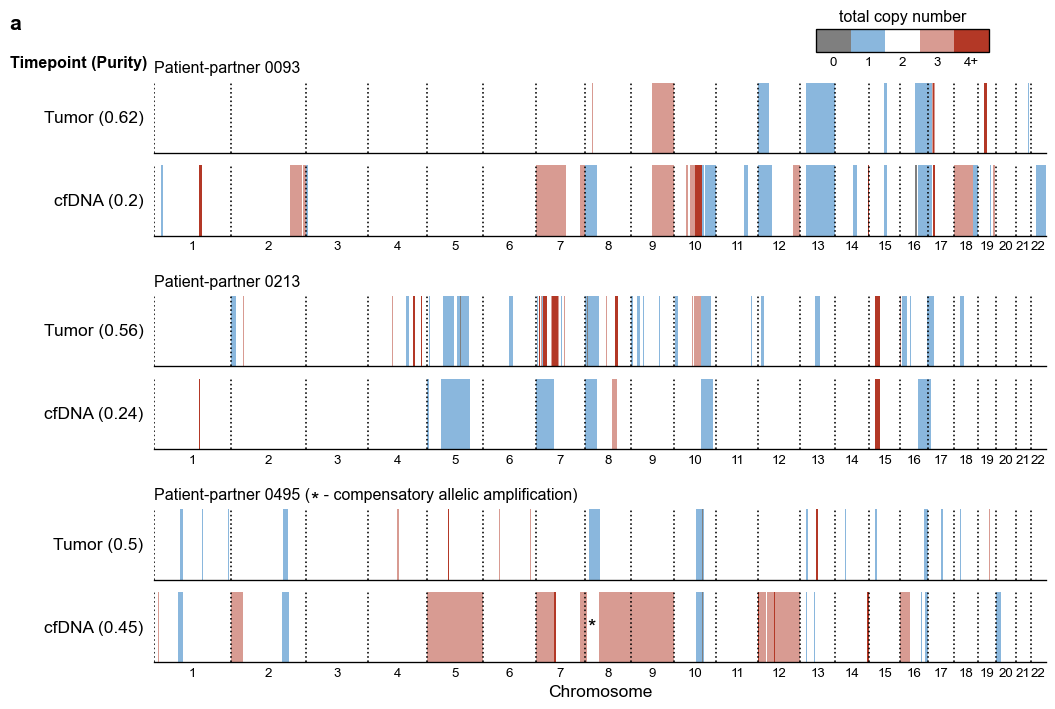

In [8]:
# create array of axes - 8x1. A spacer axis is used in between patients
fig, ax = plt.subplots(8, 1, figsize = (12, 8), 
                       gridspec_kw = {'height_ratios': [1, 1, 0.5, 1, 1, 0.5, 1, 1], 'hspace': 0.2})

# loop through each sample
i = 0
for samp in shared_samples:
    
    if i in [2, 5]:
        ax[i].axis('off')
        i += 1
        
    # subset the segmentation file to that sample
    abs_seg_file = absolute_copy_number_data[absolute_copy_number_data['Sample'] == samp].copy()
    abs_seg_file['total_cn'] = abs_seg_file['Allele_1_CN'] + abs_seg_file['Allele_2_CN']
    
    cn_obj = copynumber.CopyNumber(samp)
    cn_obj.segments = abs_seg_file
    
    # visualize the total copy number across the genome
    cn_obj.visualize_cnas(ax = ax[i], total_cn_col = 'total_cn')
    
    ylabel = 'Tumor' if i in [0, 3, 6] else 'cfDNA'
    ylabel += ' ({})'.format(purities[i])
    ax[i].set_ylabel(ylabel, rotation = 0, ha = 'right', va = 'center')
    
    if 'Tumor' in ylabel:
        label = 'Patient-partner ' + patients[i]
        if '0495' in label: 
            label += ' (   - compensatory allelic amplification)'
            ax[i].text(x = 0.18, y = 1.12, s = '*', transform = ax[i].transAxes, fontsize = 16, va = 'center', ha = 'center')
            
        ax[i].text(x = 0, y = 1.1, s = label, ha = 'left', va = 'bottom')

        ax[i].set_xticklabels([])
    i += 1
    
ax[-1].set_xlabel('Chromosome')
ax[-1].text(x = 0.491, y = 0.5, s = '*', transform = ax[-1].transAxes, fontsize = 16, va = 'center', ha = 'center')

# add color bar. First define the colors
cmap_list = []
for cn, color in cn_obj.color_dict.items():
    if cn > 4: continue
    facecolor = color['facecolor']
    if 'alpha' in color:
        alpha = color['alpha']
    else:
        alpha = 1
    cmap_list.append((facecolor[0], facecolor[1], facecolor[2], alpha))
    
cmap = matplotlib.colors.LinearSegmentedColormap.from_list(
       'Custom cmap', cmap_list, len(cmap_list))
bounds = range(6)
norm = matplotlib.colors.BoundaryNorm(bounds, len(cmap_list))

# add it to its own axis
ax2 = fig.add_axes([0.7, 0.92, 0.15, 0.03])
cb = matplotlib.colorbar.ColorbarBase(ax2, cmap=cmap, norm=norm, orientation = 'horizontal', ticks=np.arange(0, 5, 1) + 0.5)
cb.ax.set_xticklabels(['0', '1', '2', '3', '4+'])
cb.ax.tick_params(length = 0)
cb.ax.set_title('total copy number', fontsize = 12)

fig.text(x = 0.0, y = 0.9, s = 'Timepoint (Purity)', weight = 'bold')
fig.text(x = 0.0, y = 0.95, s = 'a', weight = 'bold', fontsize = 16)

fig.savefig('figures/supplementary-figures/supplementary-s12.pdf', bbox_inches='tight')

## Supplementary Figure S13 - Mutation exclusivity between tumor and cfDNA samples from the same patient, related to Fig. 4B

In [9]:
shared_mutations = pd.read_csv('ref/data/shared-mutations.csv')

In [10]:
purities = {
    '0020': ['< 0.10', '', '< 0.10'],
    '0028': ['0.35', '', '< 0.10'],
    '0029': ['< 0.10', '', '0.25'],
    '0062': ['0.42', '', '< 0.10'],
    '0093': ['0.62', '', '0.20'],
    '0126': ['< 0.10', '', '< 0.10'],
    '0187': ['0.34', '', '< 0.10'],
    '0213': ['0.56', '', '0.23'],
    '0495': ['0.50', '', '0.45'],
    '0521': ['< 0.10', '', '0.24']
}

# time between samples in years
sample_times = {
    '0020': 2,
    '0028': 7,
    '0029': 4,
    '0062': 3,
    '0093': 10,
    '0126': 8,
    '0187': 1,
    '0213': 2,
    '0495': 6,
    '0521': 14
}

We construct the plotted data by splitting mutations into shared and unique subsets

In [11]:
combined_unique_barplot = []
for pt in sorted(set(shared_mutations['patient'])):
    pt_shared_muts = shared_mutations[shared_mutations['patient'] == pt]
    
    # rename patient to patient label
    pt = '0'*(4 - len(str(pt))) + str(pt)
    
    pt_purities = purities[pt]
    
    shared = ((pt_shared_muts['tumor_f_ffpe'] > 0) & (pt_shared_muts['tumor_f_bbx'] > 0)).sum()
    tumor_unique = ((pt_shared_muts['tumor_f_ffpe'] > 0) & (pt_shared_muts['tumor_f_bbx'] == 0)).sum()
    cfdna_unique = ((pt_shared_muts['tumor_f_ffpe'] == 0) & (pt_shared_muts['tumor_f_bbx'] > 0)).sum()
    
    for key, number, purity in zip(['Tumor unique', 'Shared', 'cfDNA unique'],
                                   [tumor_unique, shared, cfdna_unique],
                                   pt_purities):
        combined_unique_barplot.append([pt, key, number, purity])
        
combined_unique_barplot = pd.DataFrame(combined_unique_barplot, 
                                       columns = ['part', 'context', 'count', 'purity'])

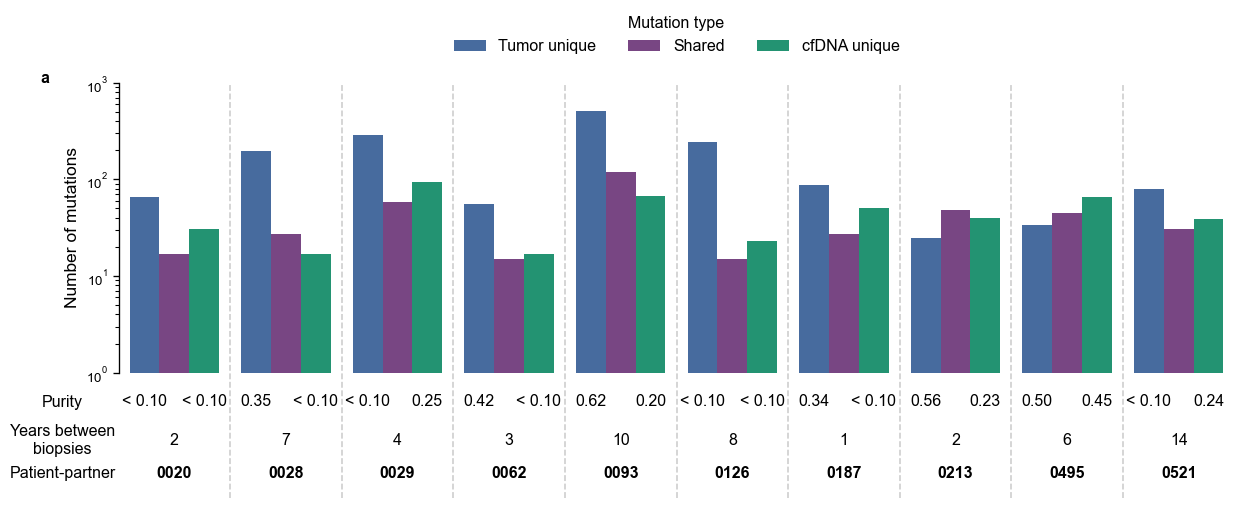

In [12]:
fig, ax = plt.subplots(1, figsize = (15, 4))
sns.barplot(data = combined_unique_barplot, x = 'part', y = 'count', hue = 'context', 
            palette = {'Tumor unique': bold_10[2], 'Shared': bold_10[0], 'cfDNA unique': bold_10[1]})
bars = [i for i in ax.containers if isinstance(i, BarContainer)]
ax.set_yscale('log')
sns.despine(bottom = True)
sns.despine(bottom = True)
ax.tick_params(axis = 'x', length = 0, labelsize = 12, pad = 70)
plt.xticks(weight = 'bold')
ax.set_ylabel('Number of mutations')
ax.set_xlabel('')
ax.set_yticks([1, 10, 100, 1000]);

# get the transform to go from data coordinates to display and from display to figure
transData = ax.transData
transFig = fig.transFigure.inverted()

# add purities
for i, part in enumerate(combined_unique_barplot['part'].drop_duplicates()):
    purity_data = combined_unique_barplot[combined_unique_barplot['part'] == part]
    
    # add purity labels
    for j in [0, 2]:
        purity = purity_data['purity'].iloc[j]
        bar = bars[j].patches[i]
        xloc = bar.get_xy()[0] + bar.get_width() / 2
        ax.text(s = purity, x = xloc, y = 0.5, transform = ax.transData, ha = 'center', va = 'center')
    
    # add dates
    bar = bars[1].patches[i]
    xloc = bar.get_xy()[0] + bar.get_width() / 2
    years = sample_times[part]
    ax.text(s = years, x = xloc, y = 0.2, transform = ax.transData, ha = 'center', va = 'center')
        
    # add vertical line to improve readability - go from data to display to figure
    xline = transFig.transform(transData.transform((i + 0.5, 1)))[0]
    ystart = transFig.transform(transData.transform((i + 0.5, 0.05)))[1]
    yend = transFig.transform(transData.transform((i + 0.5, 1000)))[1]
    
    if i != 9:
        fig.add_artist(lines.Line2D([xline, xline], [ystart, yend], color = 'black', linestyle = 'dashed', alpha = 0.2))
        
ax.text(s = 'Purity', x = -1, y = 0.5, transform = ax.transData, ha = 'center', va = 'center')
ax.text(s = 'Years between\nbiopsies', x = -1, y = 0.2, transform = ax.transData, ha = 'center', va = 'center')
ax.text(s = 'Patient-partner', x = -1, y = 0.09, transform = ax.transData, ha = 'center', va = 'center')
ax.legend(loc = 'lower center', bbox_to_anchor = (0.5, 1.05), ncol = 3, title = 'Mutation type', title_fontsize = 12);
ax.text(s = 'a', x = -0.07, y = 1, weight = 'bold', transform = ax.transAxes)

fig.savefig('figures/supplementary-figures/supplementary-s13.pdf', bbox_inches='tight')

## Supplementary Figure S14. Shared tumor fraction and AR copy-number log-ratios, related to Fig. 4D

In [13]:
relative_ar_amp_treatment = pd.read_csv('ref/data/copy_number_data/ULP_WGS_AR_logR_treatment.tsv', sep = '\t')

# add a column for patient-partner ID, for shared sample identification
relative_ar_amp_treatment['ID'] = relative_ar_amp_treatment['sample'].apply(lambda s: s.split('_')[2])

color_palette = {'exposed': palettable.cartocolors.qualitative.Bold_10.mpl_colors[1], 'naive': palettable.cartocolors.qualitative.Bold_10.mpl_colors[0]}

In [14]:
# finally, connect shared blood samples
shared_pts = [pt for pt, count in zip(*np.unique(relative_ar_amp_treatment['ID'], return_counts = True)) if count == 2]
shared_indices = [list(relative_ar_amp_treatment[relative_ar_amp_treatment['ID'] == pt].index) for pt in shared_pts]
shared_data = relative_ar_amp_treatment[relative_ar_amp_treatment['ID'].isin(shared_pts)]

first_time, second_time = [], []
for idx_list in shared_indices:
    shared_pt_data = relative_ar_amp_treatment.loc[idx_list]
    
    # sort the data by first > second timepoint. One sample is reversed.
    if shared_pt_data['sample'].iloc[0] == 'RP-1532_PCProject_0142_BLOOD_2_P_v1_WGS_OnPrem':
        shared_pt_data = shared_pt_data.sort_values(by='sample', ascending=False)
    else:
        shared_pt_data = shared_pt_data.sort_values(by='sample', ascending=True)
        
    first_time.append(shared_pt_data.iloc[[0]])
    second_time.append(shared_pt_data.iloc[[1]])
    
first_time = pd.concat(first_time)
second_time = pd.concat(second_time)

/Users/jettcrowdis/opt/anaconda3/lib/python3.8/site-packages/brokenaxes.py:313: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  return self.big_ax.legend(h, l, *args, **kwargs)


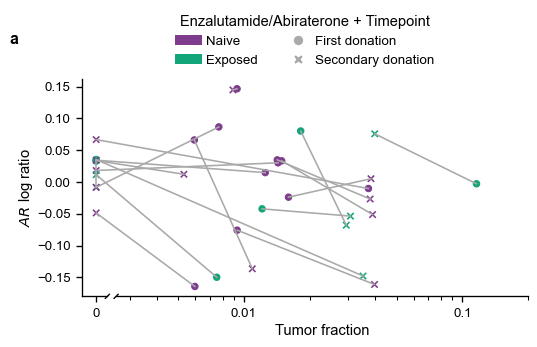

In [15]:
fig = plt.figure(figsize=(6, 3))
fig_inv_transform = fig.transFigure.inverted()
gs = fig.add_gridspec(1, 1)
bax = brokenaxes(xlims=((-0.003, 0.0023), (0.0026, 0.2)), wspace=0.04, width_ratios = [1, 16], 
                 d = 0.005, subplot_spec = gs[0, 0])

# first timepoint data
bax.scatter(x = first_time['tumor_fraction'], y = first_time['logR'], 
            c = first_time['Enzalutamide/abiraterone'].apply(lambda status: color_palette[status]).to_list(), zorder=2)

# second timepoint data
bax.scatter(x = second_time['tumor_fraction'], y = second_time['logR'], 
            marker='x', c = first_time['Enzalutamide/abiraterone'].apply(lambda status: color_palette[status]).to_list(), zorder=2)

# separate the axes of the broken axis plot for further formatting. Log scale the right plot
left_ax, right_ax = bax.axs
left_data_to_display = left_ax.transData
right_data_to_display = right_ax.transData
right_ax.set_xscale('log')

formatter = FuncFormatter(lambda y, _: '{:.16g}'.format(y)) # https://stackoverflow.com/a/49306588/3904031
right_ax.xaxis.set_major_formatter(formatter)

left_ax.set_xticks([0])
left_ax.set_xticklabels([0])

right_ax.set_xlabel('Tumor fraction', fontsize=11, labelpad = 3)
bax.set_ylabel(r'$\it{AR}$ log ratio', labelpad = 35, fontsize=11)

# manually make legend
exposed = mpatches.Rectangle((0,0), 1, 1, facecolor = color_palette['exposed'], 
                             linewidth = 0.6, label='Exposed')

naive = mpatches.Rectangle((0,0), 1, 1, facecolor = color_palette['naive'], 
                           linewidth = 0.6, label='Naive')

first = lines.Line2D(xdata = [0], ydata = [0], marker='o', markerfacecolor='darkgrey', markersize=8, 
                     label='First donation', color = 'w')

second = lines.Line2D(xdata = [0], ydata = [0, 0], marker='X', markerfacecolor='darkgrey', markersize=8, 
                     label='Secondary donation', color = 'w')

bax.legend(handles=[naive, exposed, first, second], ncol = 2, title = 'Enzalutamide/Abiraterone + Timepoint', 
           title_fontsize = 11, bbox_to_anchor = (0.5, 1), loc = 'lower center', 
           handletextpad = 0.3, fontsize = 10)

# finally, connect shared blood samples
for i, idx_list in enumerate(shared_indices):

    shared_pt_data = relative_ar_amp_treatment.loc[idx_list]
    
    x_fig_coords, y_fig_coords = [], []
    for _, row in shared_pt_data.iterrows():
        if row['tumor_fraction'] == 0:
            x, y = left_data_to_display.transform((row['tumor_fraction'], row['logR']))
        else:
            x, y = right_data_to_display.transform((row['tumor_fraction'], row['logR']))
        x_fig, y_fig = fig_inv_transform.transform((x, y))

        x_fig_coords.append(x_fig)
        y_fig_coords.append(y_fig)

    fig.add_artist(lines.Line2D(x_fig_coords, y_fig_coords, color='darkgrey', zorder=2))

fig.text(s = 'a', x = 0, y = 1, transform = fig.transFigure, fontweight = 'bold')
fig.savefig('figures/supplementary-figures/supplementary-s14.pdf', bbox_inches='tight')

## Supplementary Figure S15 - Ultra-low pass WGS signal for other common copy number changes in metastatic prostate cancer, related to Fig. 4D

In [16]:
# get the coverage data
ulp_coverage_data = pd.read_csv('ref/data/supplementary_data/supplementary-data-5.csv', dtype={'Chromosome': str})

# get the tumor fraction data and add it to the coverage data
tf_data = pd.read_csv('ref/data/copy_number_data/ULP_WGS_AR_logR_treatment.tsv', sep = '\t')[['sample', 'tumor_fraction']]

ulp_coverage_data = ulp_coverage_data.merge(tf_data, left_on = ['Sample'], right_on = ['sample'])
ulp_coverage_data['tumor_fraction'] = ulp_coverage_data['tumor_fraction'].astype(float)

In [17]:
# get the locations of the genes for the figure
gene_locations = pd.read_csv('ref/data/copy_number_data/gene-locations.csv', dtype={'chrom': str})

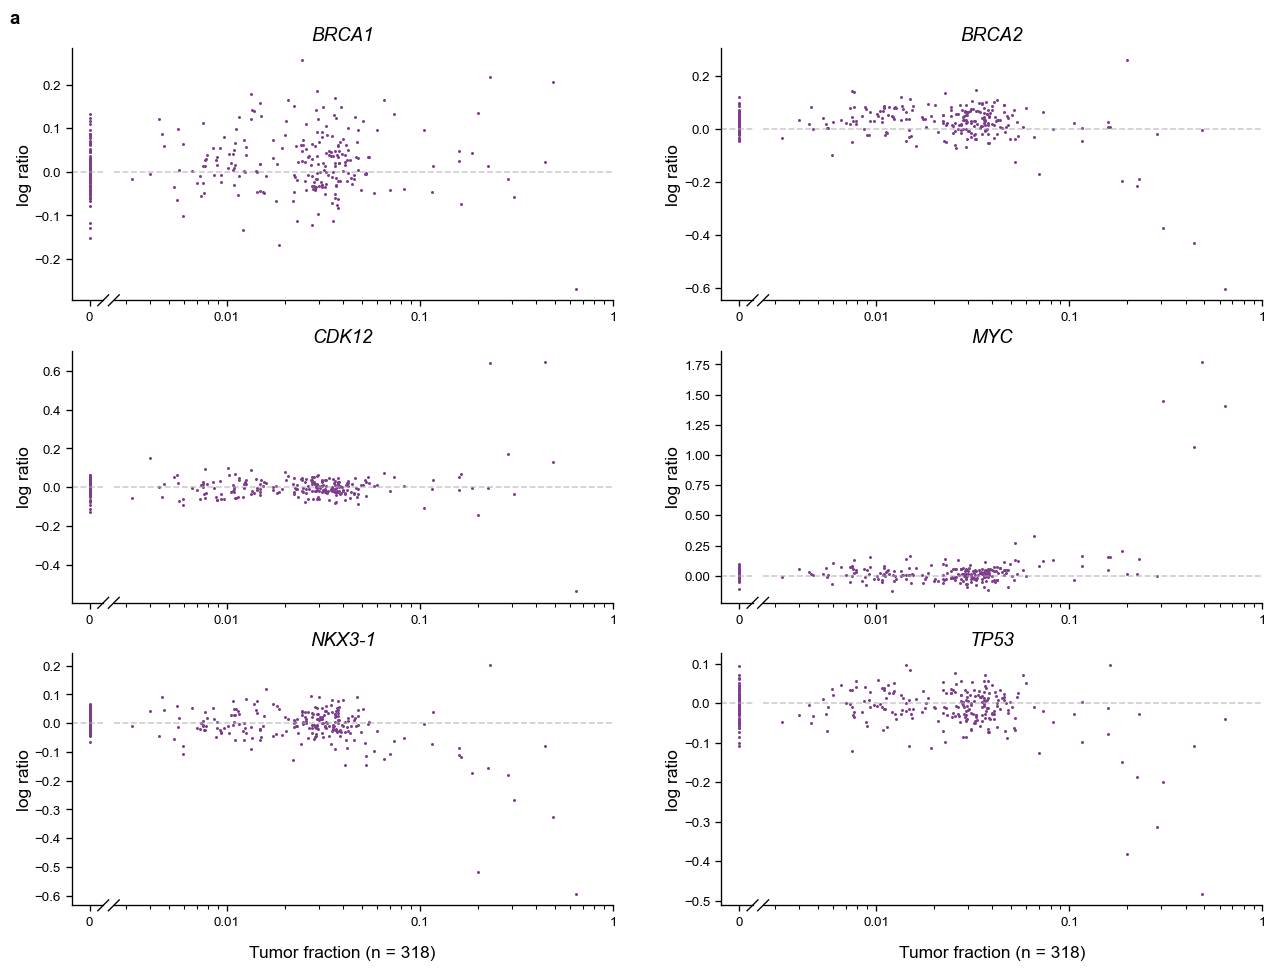

In [18]:
fig = plt.figure(figsize = (16, 16))
fig_gs = fig.add_gridspec(4, 2)

# loop through the genes, plotting their coverage in the ULP
for i, (_, row) in enumerate(gene_locations.iterrows()):
    
    # identify figure coordinates
    i, j = i // 2, i % 2
    
    # extract the coverage data. In some cases, the gene may span two bins
    gene, chrom, start, end = row[['gene', 'chrom', 'start', 'end']].values
    gene_data = ulp_coverage_data[(ulp_coverage_data['Chromosome'] == chrom) &
                                  (ulp_coverage_data['Bin_End'] > start) &
                                  (ulp_coverage_data['Bin_Start'] < end)].copy()
    
    # if the gene spans two bins, condense by taking the mean of the bins
    if len(gene_data) > 318:
        norm_gene_data = pd.DataFrame(gene_data.groupby('sample')[['Log_Copy_Ratio', 'tumor_fraction']].mean()).reset_index()
    else:
        norm_gene_data = gene_data[['sample', 'Log_Copy_Ratio', 'tumor_fraction']].copy()
        
    # create broken axis plot
    gs = gridspec.GridSpecFromSubplotSpec(2, 2, subplot_spec=fig_gs[i, j])
    bax = brokenaxes(xlims=((-0.003, 0.0023), (0.0026, 1)), wspace=0.04, 
                     width_ratios = [1, 16], d = 0.005, subplot_spec = gs[:, :])
    
    # plot the points
    bax.scatter(x = 'tumor_fraction', y = 'Log_Copy_Ratio', 
                data = norm_gene_data, s = 2) 
    
    # format the plots
    left_ax, right_ax = bax.axs
    right_ax.set_xscale('log')
    left_ax.axhline(y = 0, color = 'darkgrey', alpha = 0.6, linestyle = 'dashed')
    right_ax.axhline(y = 0, color = 'darkgrey', alpha = 0.6, linestyle = 'dashed')
    
    formatter = FuncFormatter(lambda y, _: '{:.16g}'.format(y)) # https://stackoverflow.com/a/49306588/3904031
    
    right_ax.xaxis.set_major_formatter(formatter)

    left_ax.set_xticks([0])
    left_ax.set_xticklabels([0])
    
    # add labels
    if i == 2:
        bax.set_xlabel('Tumor fraction (n = 318)', y = -0.01)
    
    if i == 0 and j == 0:
        left_ax.text(s = 'a', x = -2, y = 1.1, fontweight = 'bold', 
                     transform = left_ax.transAxes, fontsize = 14)
    
    bax.set_ylabel('log ratio'.format(gene))
    bax.set_title('{}'.format(gene), fontstyle = 'italic')
    
fig.savefig('figures/supplementary-figures/supplementary-s15.pdf', bbox_inches='tight')